# Code to read a CSV file into a Pandas DataFrame and basic operations

This notebook will guide you through opening and reading a csv file and store the data into a pandas dataframe. The CSV is formed in the Uproot_Tree_Plotter tutorial but is no necessary to run through this tutorial

In [1]:
import pandas as pd
import numpy as np

We will read in the csv file into a pandas dataframe. The CSV is seprated by commas so we will use this delimter in order to read the file.

In [4]:
df = pd.read_csv('Sample_data.csv', delimiter = ',')

We now have our information stored into a dataframe. This dataframe contains information about the muons from the previous tutorial. Now we can use pandas to see what is in this collection and manipulate it.

In [13]:
df

,entry,subentry,pt,eta,phi,mass
0,0,0,41.156140,-0.454712,-2.491699,0.105713
1,0,1,40.389810,-0.233673,0.681396,0.105713
2,2,0,29.009573,1.445312,-2.372070,0.105713
3,2,1,14.167344,1.373779,1.144287,0.105713
4,4,0,93.018745,-0.760254,0.094955,0.105713
...,...,...,...,...,...,...
7005,13293,0,55.728530,1.270996,0.187378,0.105713
7006,13293,1,40.600178,0.774902,-1.062012,0.105713
7007,13296,0,55.219284,0.991577,1.410156,0.105713
7008,13296,1,45.488670,2.251953,2.749023,0.105713


In [34]:
df.pt

0       41.156140
1       40.389810
2       29.009573
3       14.167344
4       93.018745
          ...    
7005    55.728530
7006    40.600178
7007    55.219284
7008    45.488670
7009    51.894005
Name: pt, Length: 7010, dtype: float64

For this dataframe, each entry represents an event, while each subentry represents a muon in the event. Lets break this up to see it easier.

In [37]:
df.set_index(['entry','subentry',df.index], inplace=True)

In [38]:
df

pt       eta       phi      mass
entry subentry                                              
0     0        0     41.156140 -0.454712 -2.491699  0.105713
      1        1     40.389810 -0.233673  0.681396  0.105713
2     0        2     29.009573  1.445312 -2.372070  0.105713
      1        3     14.167344  1.373779  1.144287  0.105713
4     0        4     93.018745 -0.760254  0.094955  0.105713
...                        ...       ...       ...       ...
13293 0        7005  55.728530  1.270996  0.187378  0.105713
      1        7006  40.600178  0.774902 -1.062012  0.105713
13296 0        7007  55.219284  0.991577  1.410156  0.105713
      1        7008  45.488670  2.251953  2.749023  0.105713
13298 0        7009  51.894005 -1.284668  2.360840  0.105713

[7010 rows x 4 columns]

Now that we have changed this to a MultiIndex we can grab some useful information by taking advantage of the subentries. Lets take a look at the first 2 muons in terms of the pt. We can plot those quantities quickly with boost histogram using mpl-hep for style.

In [46]:
Leading_pt = df.pt.xs(0, level='subentry')
Trailing_pt = df.pt.xs(1, level='subentry')

In [47]:
Leading_pt

entry      
0      0       41.156140
2      2       29.009573
4      4       93.018745
9      6       35.238907
11     7       27.201418
                 ...    
13288  7001    39.552364
13292  7003    48.596127
13293  7005    55.728530
13296  7007    55.219284
13298  7009    51.894005
Name: pt, Length: 4381, dtype: float64

/home/submit/freerc/miniforge3/envs/notebook/lib/python3.8/site-packages/hist/__init__.py:52: UserWarning: Misspelling error, 'axes' should be 'axis'
  warnings.warn(msg)
/home/submit/freerc/miniforge3/envs/notebook/lib/python3.8/site-packages/hist/__init__.py:52: UserWarning: Misspelling error, 'axes' should be 'axis'
  warnings.warn(msg)


[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f9d38994e20>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

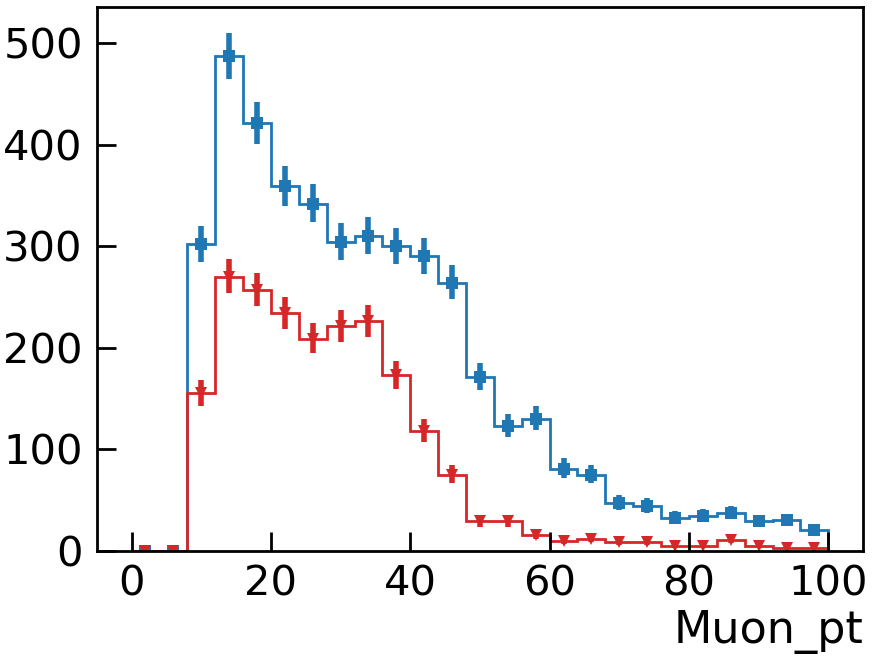

In [58]:
import mplhep as hep
import hist

#hep.cms.label(data=False, year='2018')
hep.style.use("LHCb1")
# {"ALICE" | "ATLAS" | "CMS" | "LHCb1" | "LHCb2"}

hpt = hist.Hist(hist.axes.Regular(25,0,100,name="Muon_pt"))
hpt.fill(Muon_pt=Leading_pt)
hpt.plot()
hpt2 = hist.Hist(hist.axes.Regular(25,0,100,name="Muon_pt"))
hpt2.fill(Muon_pt=Trailing_pt)
hpt2.plot()